In [1]:
import numba as nb
import random
import math
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import powerlaw
from collections import Counter
from mpl_toolkits import mplot3d
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from networkx import erdos_renyi_graph

# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
# import plotly.graph_objects as go


import matplotlib.font_manager as fm # Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 2)
plt.rcParams["figure.figsize"] = (10,10)

In [39]:
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1, gamma = 3):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.in_degree(n) > max_degree:
            max_degree = graph.in_degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.in_degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    

    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-gamma) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

In [12]:
import random
import networkx as nx



class Make_network:
    
    def __init__(self, group1, group2, edges, kf, t):
        self.group1 = group1
        self.group2 = group2
        self.edges = edges
        self.kf = kf
        self.t = t
        
        self.G = nx.Graph()
        self.edge_list = []
        self.destination_nodes = []
        self.i = 0
        self.bin_ = random.sample(group1, k = math.ceil(len(group1)*(kf)))

    def check_constraint(self, edge):
        pass
      
    
    
    def kf_func(self, edge, group2_node,chosen_node):
        
            
        self.destination_nodes.append(chosen_node)
        self.bin_.append(random.choice(self.group1))
        if np.random.uniform() > self.kf:
            self.bin_.append(chosen_node)
        
    def t_func(self,  edge, group2_node,chosen_node):
        

        if np.random.uniform() < self.t: 

            friends = self.G[group2_node]

            for friend in friends:
                edge = tuple([friend, chosen_node])
                if self.G.has_edge(group2_node, chosen_node): continue
           
                self.G.add_edges_from([edge])
                self.i+=1

                    
            
    def r_func(self,  edge, group2_node,chosen_node):
        
        if np.random.uniform() < r:
            pass
            
            
    
    def make_network(self):
       
        while self.i < (self.edges):
            
        
        
            group2_node = random.choice(self.group2)


            chosen_node = random.choice(self.bin_)
        
        
            edge = tuple([group2_node, chosen_node])
            
            if self.G.has_edge(group2_node, chosen_node):
      
                continue
            
            self.G.add_edges_from([edge])
            self.edge_list.append(edge)
            

            
            self.i += 1
        
        
            self.kf_func(edge, group2_node,chosen_node)
            
            self.t_func(edge, group2_node,chosen_node)
#             self.t_func(edge, chosen_node,group2_node)
        
            
                
        return self.G
                
#  abs
            

        
        

0

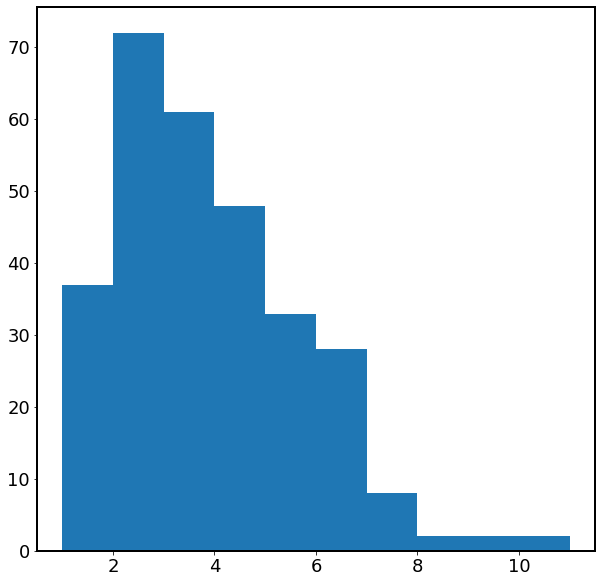

In [16]:
group1 = random.sample(range(1, 100000), 300)
group2 = random.sample(range(100000, 200000), 300)

edges = 500
kf  = 1
t = 1



N = Make_network(group1, group1, edges, kf, t)



G = N.make_network()



l_degrees = [ i[1] for i in G.degree()]

color_map = []
for node in G:
    if node < 100000:
        color_map.append('blue')
    else: 
        color_map.append('green')      


#     l_degrees_all.extend(l_degrees)

plt.hist(l_degrees)

l_degrees.count(80)

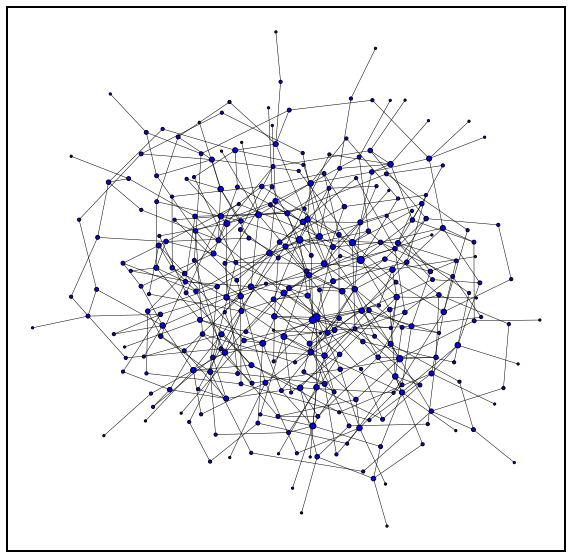

In [17]:
from networkx import *

pos = nx.kamada_kawai_layout(G)
d = dict(G.degree)
# Need to specify a layout when calling the draw functions below
# spring_layout is the default layout used within networkx (e.g. by `draw`)
# pos = spring_layout(G)

nodes = draw_networkx_nodes(G, pos,  node_size=[d[k]* 5 for k in d], node_color=color_map)

# Set edge color to red
nodes.set_edgecolor('black')
draw_networkx_edges(G, pos, width = 0.5)

# Uncomment this if you want your labels
# draw_networkx_labels(G, pos)

# nx.draw(G)

# plt.savefig(f"plot__kf={kf}_t={t}.pdf")
plt.show()

In [15]:
nx.transitivity(G)

0.007302823758519961

In [49]:
# G = nx.complete_graph(5)

pos = nx.kamada_kawai_layout(G)

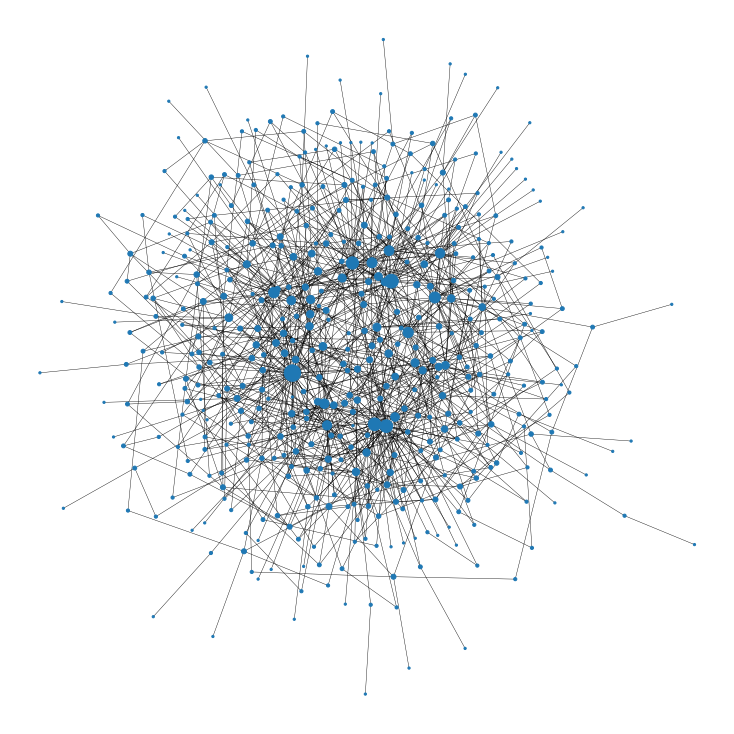

In [50]:

nx.draw(G, pos=pos, node_size=[d[k]* 5 for k in d], width=0.4)

In [ ]:
# G.nodes[edge[0]]

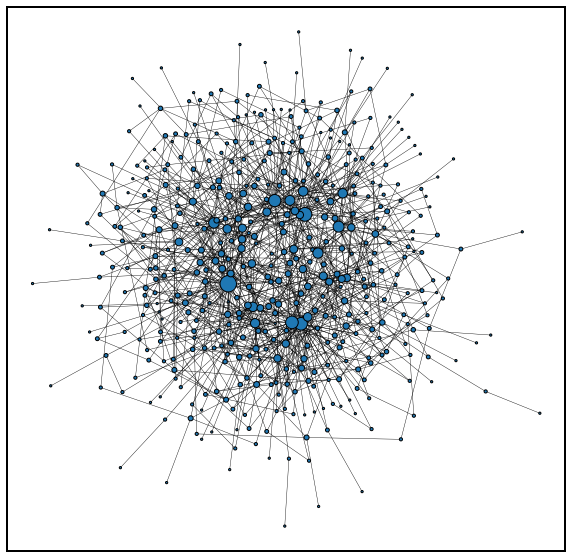

In [51]:
from networkx import *
d = dict(G.degree)
# Need to specify a layout when calling the draw functions below
# spring_layout is the default layout used within networkx (e.g. by `draw`)
# pos = spring_layout(G)
nodes = draw_networkx_nodes(G, pos,  node_size=[d[k]* 5 for k in d])
# Set edge color to red
nodes.set_edgecolor('black')
draw_networkx_edges(G, pos, width = 0.4)
# Uncomment this if you want your labels
## draw_networkx_labels(G, pos)
plt.show()
